<a href="https://colab.research.google.com/github/christianeloysio/Data_Science/blob/main/Who_gets_to_live_during_the_pandemic%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who gets to live during the pandemic?

COVID-19 is an infectious disease caused by the coronavirus. Transmitted mainly through infected people droplets from coughing or sneezing, the severity of symptoms varies greatly in each individual.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/christianeloysio/Data_Science/main/images/Covid.jpg"></center>

To date, it is observed that about 80% of confirmed cases are asymptomatic or very brief, with minor symptoms. Most of the people who fall into this group recover without any sequel.

However, 15% of people have serious infections and need oxygen. The other 5% will be classified as very serious infections and will need assisted ventilation, through mechanical respirators in a hospital setting.

Although the first known covid infection was in November 2019, a lot of research has been developed around the subject due to the pandemic. The World Health Organization (WHO) approved the first vaccine for Covid in December 2020, only one year after the first known case. 

On its own [website](https://www.who.int/news/item/31-12-2020-who-issues-its-first-emergency-use-validation-for-a-covid-19-vaccine-and-emphasizes-need-for-equitable-global-access), WHO representants affirmed that "It’s vitally important that we secure the critical supply needed to serve all countries around the world and stem the pandemic". But did that actually happen?

In order to **raise situational awareness regarding COVID-19 vaccination access**, I will conduct an analysis of public data on the disease, focusing on **understanding if countries with higher GDP per capita had more access to the vaccine**.


## Data Extraction

The Data that will be analyzed was extracted from [Our World in Data](https://ourworldindata.org/) (OWD), which maintains datasets about poverty, poverty, disease, hunger, climate change, war, existential risks, and inequality. Their objective is to make the knowledge on these big problems accessible and understandable.

The [COVID dataset](https://github.com/owid/covid-19-data/tree/master/public/data) is updated daily for different countries around the world, with information about vaccination, tests, number of cases, deaths, and others. The source, update frequency, and the number of countries for each metric is displayed on the table below:

|           Metrics           |                           Source                          | Updated | Countries |
|:---------------------------:|:---------------------------------------------------------:|:-------:|:---------:|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 217       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 138       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 37        |
| Confirmed cases             | JHU CSSE* COVID-19 Data                                    | Daily   | 194       |
| Confirmed deaths            | JHU CSSE* COVID-19 Data                                    | Daily   | 194       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 185       |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 186       |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 240       |

**JHU CSSE - John Hopkins University Center System Science and Engineering* 

As seen above, the data come from different sources, among Universities and Government Official Publications. This situation represents a challenge for the analysis since data from multiple sources can use different methodologies that may cause misrepresentation of the current situation.

Even though that may be true, we will be analyzing the dataset to see if there is a correlation between the economic health of countries and access to vaccinations.  

### Dictionary of Variables
The variables available in the dataset, and their explanation, are:

| Variables                                  | Description                                                                                                                                                                                                                                                                                                                                               |
|-----------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| iso_code                                | [ISO 3166-1 alpha-3](https://www.iso.org/iso-3166-country-codes.html) – three-letter country codes                                                                                                                                                                                                                                                                                                           |
| continent                               | Continent of the geographical location                                                                                                                                                                                                                                                                                                                    |
| location                                | Geographical location                                                                                                                                                                                                                                                                                                                                     |
| date                                    | Date of observation                                                                                                                                                                                                                                                                                                                                       |
| total_cases                             | Total confirmed cases of COVID-19                                                                                                                                                                                                                                                                                                                         |
| new_cases                               | New confirmed cases of COVID-19                                                                                                                                                                                                                                                                                                                           |
| new_cases_smoothed                      | New confirmed cases of COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                          |
| total_deaths                            | Total deaths attributed to COVID-19                                                                                                                                                                                                                                                                                                                       |
| new_deaths                              | New deaths attributed to COVID-19                                                                                                                                                                                                                                                                                                                         |
| new_deaths_smoothed                     | New deaths attributed to COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                        |
| total_cases_per_million                 | Total confirmed cases of COVID-19 per 1,000,000 people                                                                                                                                                                                                                                                                                                    |
| new_cases_per_million                   | New confirmed cases of COVID-19 per 1,000,000 people                                                                                                                                                                                                                                                                                                      |
| new_cases_smoothed_per_million          | New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people                                                                                                                                                                                                                                                                                     |
| total_deaths_per_million                | Total deaths attributed to COVID-19 per 1,000,000 people                                                                                                                                                                                                                                                                                                  |
| new_deaths_per_million                  | New deaths attributed to COVID-19 per 1,000,000 people                                                                                                                                                                                                                                                                                                    |
| new_deaths_smoothed_per_million         | New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people                                                                                                                                                                                                                                                                                   |
| reproduction_rate                       | Real-time estimate of the effective reproduction rate (R) of COVID-19.   See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database                                                                                                                                                                                                           |
| icu_patients                            | Number of COVID-19 patients in intensive care units (ICUs) on a given day                                                                                                                                                                                                                                                                                 |
| icu_patients_per_million                | Number of COVID-19 patients in intensive care units (ICUs) on a given day   per 1,000,000 people                                                                                                                                                                                                                                                          |
| hosp_patients                           | Number of COVID-19 patients in hospital on a given day                                                                                                                                                                                                                                                                                                    |
| hosp_patients_per_million               | Number of COVID-19 patients in hospital on a given day per 1,000,000   people                                                                                                                                                                                                                                                                             |
| weekly_icu_admissions                   | Number of COVID-19 patients newly admitted to intensive care units (ICUs)   in a given week                                                                                                                                                                                                                                                               |
| weekly_icu_admissions_per_million       | Number of COVID-19 patients newly admitted to intensive care units (ICUs)   in a given week per 1,000,000 people                                                                                                                                                                                                                                          |
| weekly_hosp_admissions                  | Number of COVID-19 patients newly admitted to hospitals in a given week                                                                                                                                                                                                                                                                                   |
| weekly_hosp_admissions_per_million      | Number of COVID-19 patients newly admitted to hospitals in a given week   per 1,000,000 people                                                                                                                                                                                                                                                            |
| total_tests                             | Total tests for COVID-19                                                                                                                                                                                                                                                                                                                                  |
| new_tests                               | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                             |
| total_tests_per_thousand                | Total tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                                 |
| new_tests_per_thousand                  | New tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                                   |
| new_tests_smoothed                      | New tests for COVID-19 (7-day smoothed). For countries that don't report   testing data on a daily basis, we assume that testing changed equally on a   daily basis over any periods in which no data was reported. This produces a   complete series of daily figures, which is then averaged over a rolling 7-day   window                              |
| new_tests_smoothed_per_thousand         | New tests for COVID-19 (7-day smoothed) per 1,000 people                                                                                                                                                                                                                                                                                                  |
| positive_rate                           | The share of COVID-19 tests that are positive, given as a rolling 7-day   average (this is the inverse of tests_per_case)                                                                                                                                                                                                                                 |
| tests_per_case                          | Tests conducted per new confirmed case of COVID-19, given as a rolling   7-day average (this is the inverse of positive_rate)                                                                                                                                                                                                                             |
| tests_units                             | Units used by the location to report its testing data                                                                                                                                                                                                                                                                                                     |
| total_vaccinations                      | Total number of COVID-19 vaccination doses administered                                                                                                                                                                                                                                                                                                   |
| people_vaccinated                       | Total number of people who received at least one vaccine dose                                                                                                                                                                                                                                                                                             |
| people_fully_vaccinated                 | Total number of people who received all doses prescribed by the   vaccination protocol                                                                                                                                                                                                                                                                    |
| total_boosters                          | Total number of COVID-19 vaccination booster doses administered (doses   administered beyond the number prescribed by the vaccination protocol)                                                                                                                                                                                                           |
| new_vaccinations                        | New COVID-19 vaccination doses administered (only calculated for   consecutive days)                                                                                                                                                                                                                                                                      |
| new_vaccinations_smoothed               | New COVID-19 vaccination doses administered (7-day smoothed). For   countries that don't report vaccination data on a daily basis, we assume that   vaccination changed equally on a daily basis over any periods in which no   data was reported. This produces a complete series of daily figures, which is   then averaged over a rolling 7-day window |
| total_vaccinations_per_hundred          | Total number of COVID-19 vaccination doses administered per 100 people in   the total population                                                                                                                                                                                                                                                          |
| people_vaccinated_per_hundred           | Total number of people who received at least one vaccine dose per 100   people in the total population                                                                                                                                                                                                                                                    |
| people_fully_vaccinated_per_hundred     | Total number of people who received all doses prescribed by the   vaccination protocol per 100 people in the total population                                                                                                                                                                                                                             |
| total_boosters_per_hundred              | Total number of COVID-19 vaccination booster doses administered per 100   people in the total population                                                                                                                                                                                                                                                  |
| new_vaccinations_smoothed_per_million   | New COVID-19 vaccination doses administered (7-day smoothed) per   1,000,000 people in the total population                                                                                                                                                                                                                                               |
| stringency_index                        | Government Response Stringency Index: composite measure based on 9   response indicators including school closures, workplace closures, and travel   bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                                   |
| population                              | Population in 2020                                                                                                                                                                                                                                                                                                                                        |
| population_density                      | Number of people divided by land area, measured in square kilometers,   most recent year available                                                                                                                                                                                                                                                        |
| median_age                              | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                                      |
| aged_65_older                           | Share of the population that is 65 years and older, most recent year   available                                                                                                                                                                                                                                                                          |
| aged_70_older                           | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                                |
| gdp_per_capita                          | Gross domestic product at purchasing power parity (constant 2011   international dollars), most recent year available                                                                                                                                                                                                                                     |
| extreme_poverty                         | Share of the population living in extreme poverty, most recent year   available since 2010                                                                                                                                                                                                                                                                |
| cardiovasc_death_rate                   | Death rate from cardiovascular disease in 2017 (annual number of deaths   per 100,000 people)                                                                                                                                                                                                                                                             |
| diabetes_prevalence                     | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                               |
| female_smokers                          | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                                      |
| male_smokers                            | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                        |
| handwashing_facilities                  | Share of the population with basic handwashing facilities on premises,   most recent year available                                                                                                                                                                                                                                                       |
| hospital_beds_per_thousand              | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                                     |
| life_expectancy                         | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                          |
| human_development_index                 | A composite index measuring average achievement in three basic dimensions   of human development—a long and healthy life, knowledge and a decent standard   of living. Values for 2019, imported from   http://hdr.undp.org/en/indicators/137506                                                                                                          |
| excess_mortality                        | Percentage difference between the reported number of weekly or monthly   deaths in 2020–2021 and the projected number of deaths for the same period   based on previous years. For more information, see   https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                 |
| excess_mortality_cumulative             | Percentage difference between the cumulative number of deaths since 1   January 2020 and the cumulative projected deaths for the same period based on   previous years. For more information, see   https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                        |
| excess_mortality_cumulative_absolute    | Cumulative difference between the reported number of deaths since 1   January 2020 and the projected number of deaths for the same period based on   previous years. For more information, see   https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                           |
| excess_mortality_cumulative_per_million | Cumulative difference between the reported number of deaths since 1   January 2020 and the projected number of deaths for the same period based on   previous years, per million people. For more information, see   https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                       |


### Importing Covid 19 Dataset

Let´s first import the libraries we will be using in our analysis, and transforming the dataset into a Dataframe:

In [1]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import missingno as msng
import numpy as np


# importing the dataset and transforming it into a Dataframe
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Exploratory Data Analysis

To better understand the dataset, we will be performing an Exploratory Data Analysis. 

To do this, I will be looking at the characteristics as size, column names,  first entries, and missing values. Afterward, I will be formatting the types of columns we will analyze and take a first look at the evolution of cases in the world.

### Initial Exploratory Analysis



In [2]:
#checking the first entries
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
#and the last entries
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121739,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,8686.225,4.373,15.041,306.450,0.066,0.208,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3816.0,1277595.0,84.653,0.253,4607.0,0.305,0.049,20.3,tests performed,5409000.0,3105712.0,2303288.0,NaN,21865.0,27190.0,35.84,20.58,15.26,NaN,1802.0,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121740,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,8688.545,2.319,14.236,306.583,0.133,0.218,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,1279611.0,84.786,0.134,4574.0,0.303,0.047,21.3,tests performed,5424753.0,3111495.0,2313258.0,NaN,15753.0,27125.0,35.94,20.62,15.33,NaN,1797.0,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121741,ZWE,Africa,Zimbabwe,2021-10-04,131129.0,0.0,172.857,4627.0,0.0,2.857,8688.545,0.000,11.453,306.583,0.000,0.189,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5441379.0,3117596.0,2323783.0,NaN,16626.0,25371.0,36.05,20.66,15.40,NaN,1681.0,47.22,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121742,ZWE,Africa,Zimbabwe,2021-10-05,131205.0,76.0,133.286,4627.0,0.0,1.714,8693.580,5.036,8.831,306.583,0.000,0.114,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5472485.0,3128598.0,2343887.0,NaN,31106.0,26024.0,36.26,20.73,15.53,NaN,1724.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121743,ZWE,Africa,Zimbabwe,2021-10-06,131434.0,229.0,135.571,4630.0,3.0,2.000,8708.754,15.173,8.983,306.782,0.199,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5499530.0,3140386.0,2359144.0,NaN,27045.0,25566.0,36.44,20.81,15.63,NaN,1694.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
#Taking a look on the Dataframe size
print("Number of entries: \t {}".format(df.shape[0]))
print("Number of variables: \t {}".format(df.shape[1]))

Number of entries: 	 121744
Number of variables: 	 65


### Covid Scenario overview

Let´s take a look at which countries have the highest number of cases and deaths:

In [5]:
df.loc[df.date == df.date.max()].sort_values(by="total_cases", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
120064,OWID_WRL,NaN,World,2021-10-06,236339163.0,513689.0,436102.000,4826062.0,9455.0,7301.571,30011.453,65.231,55.378,612.836,1.201,0.927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.411842e+09,3.632673e+09,2.716860e+09,35084796.0,16886953.0,22806770.0,81.42,46.13,34.50,0.45,2896.0,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
6381,OWID_ASI,NaN,Asia,2021-10-06,76647301.0,173140.0,139918.714,1137253.0,1987.0,1777.714,16378.816,36.998,29.899,243.020,0.425,0.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.323050e+09,2.465640e+09,1.771837e+09,17969225.0,12614942.0,16539676.0,92.38,52.69,37.86,0.38,3534.0,NaN,4.679661e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37221,OWID_EUR,NaN,Europe,2021-10-06,60234391.0,163568.0,135077.000,1240683.0,2769.0,2070.857,80554.464,218.748,180.645,1659.227,3.703,2.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.091087e+08,4.275611e+08,3.951181e+08,5128499.0,1272028.0,1250396.0,108.21,57.18,52.84,0.69,1672.0,NaN,7.477474e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81103,OWID_NAM,NaN,North America,2021-10-06,52989474.0,136592.0,121786.571,1074474.0,3651.0,2403.571,88821.885,228.958,204.141,1801.052,6.120,4.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.303642e+08,3.481980e+08,2.854127e+08,7495490.0,1132918.0,1886493.0,105.66,58.37,47.84,1.26,3162.0,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115993,USA,North America,United States,2021-10-06,44058827.0,111338.0,101296.857,707781.0,2556.0,1730.714,132342.542,334.434,304.272,2126.011,7.678,5.199,NaN,18141.0,54.491,63157.0,189.709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.986754e+08,2.160125e+08,1.863858e+08,6372007.0,957359.0,954679.0,118.54,64.23,55.42,1.89,2839.0,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN,NaN,NaN,NaN


The dataset contains one entry as the summary of continents and the world. Because we are interested in knowing which countries have the highest number of deaths and cases, we will delete all entries with `continent` as `NaN`.

In [6]:
df_countries = df.dropna(axis=0, subset=["continent"]).copy()

Visualizing countries with the highest number of cases:

In [7]:
tc_countries = df_countries.loc[df_countries.date == df_countries.date.max()].sort_values(by="total_cases", ascending=False).head()
tc_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
115993,USA,North America,United States,2021-10-06,44058827.0,111338.0,101296.857,707781.0,2556.0,1730.714,132342.542,334.434,304.272,2126.011,7.678,5.199,NaN,18141.0,54.491,63157.0,189.709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398675414.0,216012495.0,186385751.0,6372007.0,957359.0,954679.0,118.54,64.23,55.42,1.89,2839.0,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
50981,IND,Asia,India,2021-10-06,33894312.0,22431.0,22047.429,449856.0,318.0,256.286,24324.740,16.098,15.823,322.846,0.228,0.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923526951.0,668975929.0,254551022.0,NaN,5397701.0,6262069.0,66.28,48.01,18.27,NaN,4494.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
16112,BRA,South America,Brazil,2021-10-06,21516967.0,17893.0,16774.429,599359.0,530.0,462.429,100549.657,83.615,78.388,2800.829,2.477,2.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243589234.0,152886127.0,95306373.0,NaN,852479.0,1076985.0,113.83,71.44,44.54,NaN,5033.0,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
115369,GBR,Europe,United Kingdom,2021-10-06,8044424.0,38922.0,33767.143,137694.0,150.0,112.571,117941.129,570.644,495.068,2018.763,2.199,1.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.820711e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
91003,RUS,Europe,Russia,2021-10-06,7548944.0,24479.0,24452.857,208842.0,910.0,877.429,51736.272,167.765,167.586,1431.287,6.237,6.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92192697.0,48891249.0,43301448.0,856589.0,695247.0,311000.0,63.18,33.51,29.68,0.59,2131.0,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


Visualizing data for better understanding:

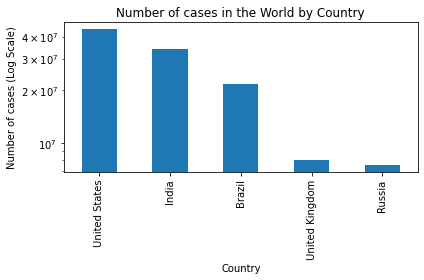

In [8]:
fig, ax = plt.subplots()

tc_countries.plot(x="location", y="total_cases", kind="bar", ax=ax, legend=False, logy=True);

ax.set_title("Number of cases in the World by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Number of cases (Log Scale)");

plt.tight_layout()

Visualizing countries with the highest number of deaths:

In [9]:
td_countries = df_countries.loc[df_countries.date == df_countries.date.max()].sort_values("total_deaths", ascending=False).head()
td_countries

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
115993,USA,North America,United States,2021-10-06,44058827.0,111338.0,101296.857,707781.0,2556.0,1730.714,132342.542,334.434,304.272,2126.011,7.678,5.199,NaN,18141.0,54.491,63157.0,189.709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398675414.0,216012495.0,186385751.0,6372007.0,957359.0,954679.0,118.54,64.23,55.42,1.89,2839.0,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
16112,BRA,South America,Brazil,2021-10-06,21516967.0,17893.0,16774.429,599359.0,530.0,462.429,100549.657,83.615,78.388,2800.829,2.477,2.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243589234.0,152886127.0,95306373.0,NaN,852479.0,1076985.0,113.83,71.44,44.54,NaN,5033.0,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
50981,IND,Asia,India,2021-10-06,33894312.0,22431.0,22047.429,449856.0,318.0,256.286,24324.740,16.098,15.823,322.846,0.228,0.184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923526951.0,668975929.0,254551022.0,NaN,5397701.0,6262069.0,66.28,48.01,18.27,NaN,4494.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
71428,MEX,North America,Mexico,2021-10-06,3691924.0,7682.0,5218.429,279896.0,790.0,417.571,28342.247,58.973,40.061,2148.712,6.065,3.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302622e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
91003,RUS,Europe,Russia,2021-10-06,7548944.0,24479.0,24452.857,208842.0,910.0,877.429,51736.272,167.765,167.586,1431.287,6.237,6.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92192697.0,48891249.0,43301448.0,856589.0,695247.0,311000.0,63.18,33.51,29.68,0.59,2131.0,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number of Deaths')

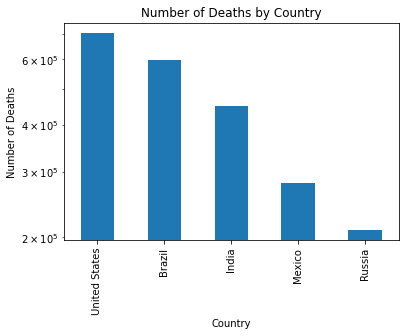

In [13]:
fig, ax = plt.subplots()

td_countries.plot(x="location", y="total_deaths", kind="bar", ax=ax, legend=False, logy=True);

ax.set_title("Number of Deaths by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Deaths")

The countries with the highest number of cases and deaths are almost the same. One reason for these countries to show at the top of the list is that countries as Russia, Brazil, and United States are also the ones with the largest population in the world. Therefore, there's a high probability that they will also have the highest number of cases in the world.

One interesting observation is that, although Mexico is not ranked as one of the Top 5 countries with the highest number of cases, it is the 4th country with the highest number of deaths. That indicates that the mortality rate in Mexico was higher than in the other countries. 

Finally, let's look at the total number of deaths and vaccination in the world:

In [11]:
df_world = df[df.location == "World"].copy()
df_world.set_index("date",inplace=True)

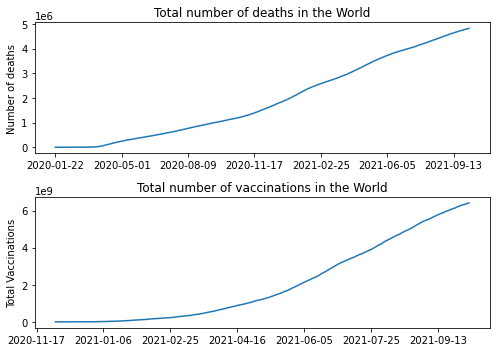

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7,5))
df_world.total_deaths.plot(kind="line", ax=ax1, legend=False)

ax1.set_title("Total number of deaths in the World")
ax1.set_xlabel("")
ax1.set_ylabel("Number of deaths")


df_world.total_vaccinations.plot(kind="line", ax=ax2, legend=False)

ax2.set_title("Total number of vaccinations in the World")
ax2.set_xlabel("")
ax2.set_ylabel("Total Vaccinations")

plt.tight_layout()

### Analyzing the correlation between GDP and Vaccination

Let´s look at all the variables in the dataset, and distinguish which variables will be analyzed.

In [16]:
# variables in the dataset
columns = df.columns
columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

As seen above, we can start to distinguish which fields we will use in our analysis. To analyze the correlation between GDP per capita and the access to vaccination in a country, we can select some columns:
- `gdp_per_capita` - Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available.
-`total_vaccinations` - Total number of COVID-19 vaccination doses administered
- `total_vaccinations_per_hundred` - Total number of COVID-19 vaccination doses administered per 100 people in the total population

According to [Investopedia](https://www.investopedia.com/terms/g/gdp.asp), Gross Domestic Product (GDP)  "is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific period. As a broad measure of overall domestic production, it functions as **a comprehensive scorecard of a given country’s economic health**." We will be using this as the measure of the economic health of a country.

The size of a country influences the total number of vaccinations and GDP. To normalize the analysis,  we will use the variables `gdp_per_capita`, which measures the economic output of a nation per person, and `total_vaccinations_per_hundred`, which will show us vaccinations per 100 people in the country. 

By doing that, we can compare countries with different sizes.

Let´s start to investigate the missing values in the dataset.
To do that, we can first visualize the missing values by using the `missingno` library. In a nutshell, each white line represents a missing value in the respective variable:

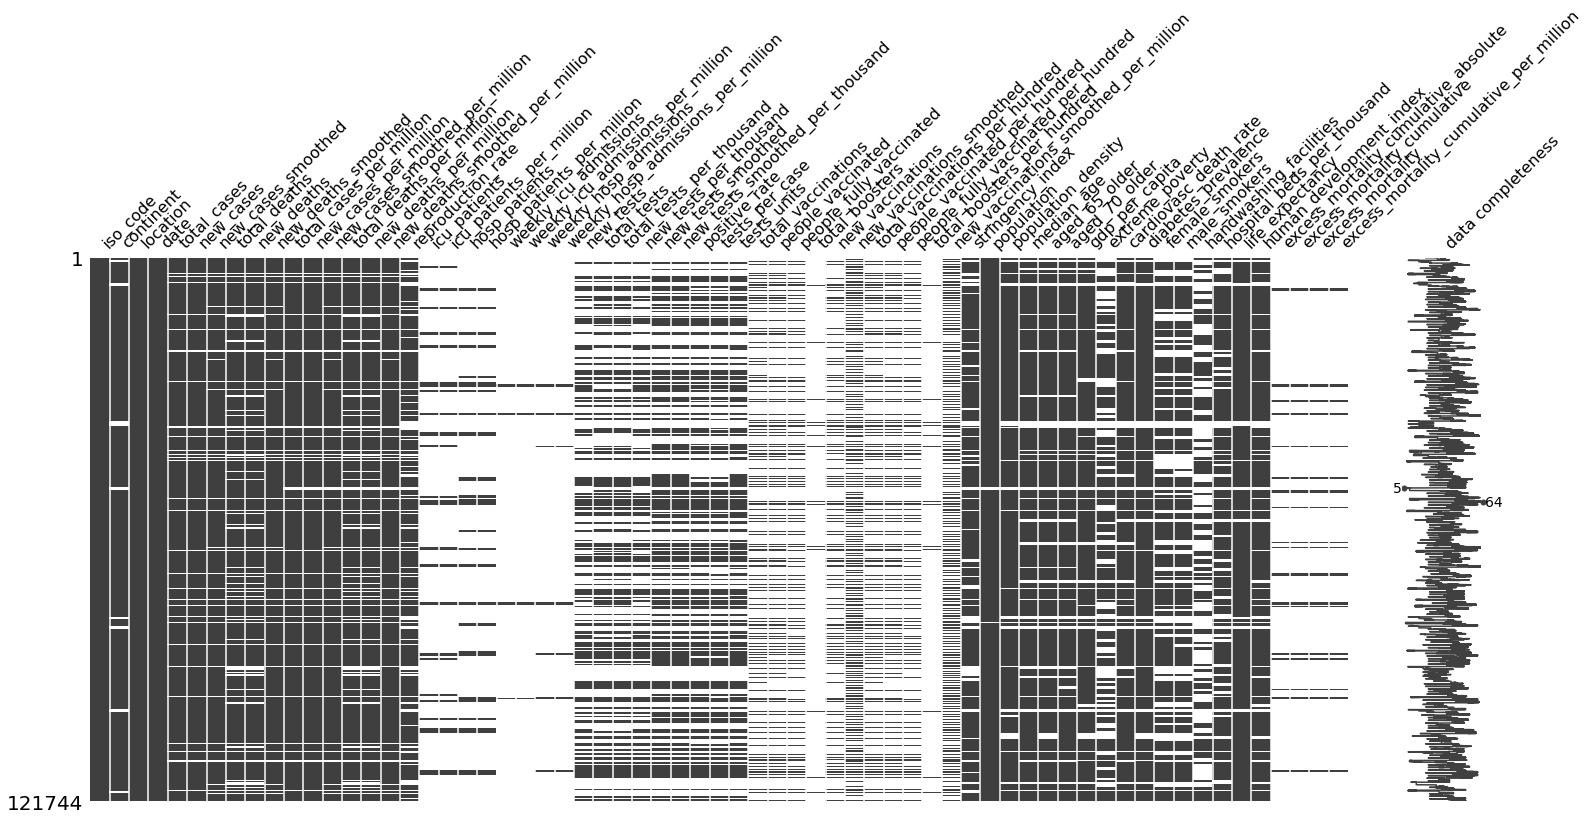

In [17]:
#visualizing the missing values
msng.matrix(df, figsize=(25,10),labels=True);

As seen above, the `total_vaccinations` variable has a high percentage of missing values. Let´s check the percentage of missing values in each variable.

In [18]:
((df.isnull().sum()/df.shape[0])*100).sort_values()[:60]

iso_code                                    0.000000
date                                        0.000000
location                                    0.000000
population                                  0.709686
continent                                   4.552175
total_cases                                 5.114010
new_cases                                   5.116474
life_expectancy                             5.163293
total_cases_per_million                     5.613418
new_cases_per_million                       5.615883
new_cases_smoothed                          5.950191
new_deaths_smoothed                         5.950191
new_deaths_smoothed_per_million             6.445492
new_cases_smoothed_per_million              6.445492
population_density                          7.592161
diabetes_prevalence                         8.773328
gdp_per_capita                             11.244086
human_development_index                    11.461756
cardiovasc_death_rate                      11.

As visualized before, the `total_vaccionations_per_hundred` variable has 77% of its values missing. A possible explanation is that the dataset was created before vaccination started, resulting in some entries with missing values. Let´s sort the dataset through date, and visualize the missing values again.

First, we need to make sure that the variable `date` has the corresponding type.

In [19]:
df.dtypes[:5]

iso_code        object
continent       object
location        object
date            object
total_cases    float64
dtype: object

Let´s tranform `date` to datetime:

In [20]:
df.date = pd.to_datetime(df.date)

Sorting the dataset through date:

In [21]:
df.sort_values(by="date", inplace=True)

Visualizing the missing values again:

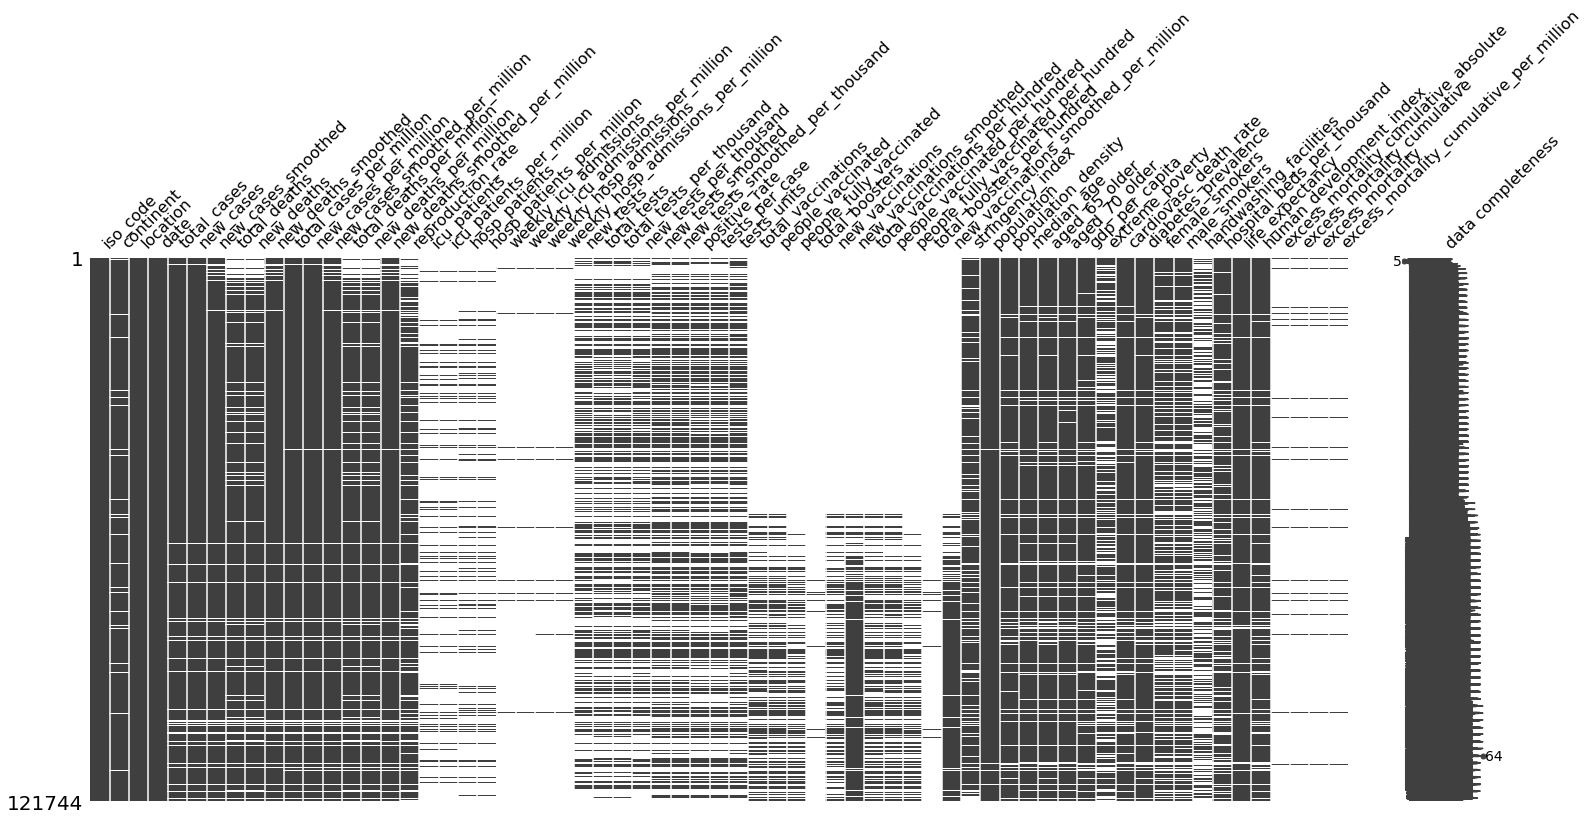

In [22]:
msng.matrix(df, figsize =(25,10), labels=True);

As we first started, there´s a specific date when vaccination started. Because entries before that do not matter to our analysis, let´s delete all the values before the first vaccination was registered.

Finding the first data that registered vaccination:

In [23]:
df.dropna(subset = ["total_vaccinations"])["date"].min()

Timestamp('2020-12-01 00:00:00')

The first vaccination was registered on December 1st, 2020. Let´s delete all the values before this date:

In [24]:
vac_df = df[df.date > "2020-12-01"].copy()

And check the percentage of missing values in each variable:

In [25]:
(vac_df.isnull().sum()/vac_df.shape[0]).sort_values()[:60]

iso_code                                 0.000000
location                                 0.000000
date                                     0.000000
population                               0.008356
continent                                0.041127
life_expectancy                          0.052899
total_cases                              0.084028
new_cases                                0.084058
new_cases_smoothed                       0.084250
new_deaths_smoothed                      0.084250
population_density                       0.084428
total_cases_per_million                  0.088598
new_cases_per_million                    0.088628
new_cases_smoothed_per_million           0.088820
new_deaths_smoothed_per_million          0.088820
diabetes_prevalence                      0.105368
total_deaths                             0.126309
new_deaths                               0.126324
total_deaths_per_million                 0.130878
new_deaths_per_million                   0.130893


Although we have lowered the percentage of missing values from 77% to 58% for the `total_vaccinations_per_hundred` variable, we still have the majority of entries missing. Although that may be problematic if we were analyzing the whole dataset, that number won't influence our analysis.

The dataset contains multiple entries for the same country, which represent the data for different dates. As vaccination increases as time pass by, we can only compare the `total_vaccinations_per_hundred` on the same date. Let´s first search for the latest date that the variable is available:

In [34]:
vac_df.dropna(subset=["total_vaccinations_per_hundred"])["date"].max()

Timestamp('2021-10-06 00:00:00')

Let´s keep only the entries that are from that specific date:

In [35]:
last_df = df[df.date == "2021-10-06"].copy()

And delete the entries that have one of the two mentioned variables, or `continent` missing:


In [41]:
last_df.dropna(axis=0, subset=["total_vaccinations_per_hundred", "gdp_per_capita", "continent"], inplace=True)

Checking the number of entries that have valid entries for `total_vaccinations_per_hundred`, and `gdp_per_capita`:

In [42]:
print("Number of entries: \t {}".format(last_df.shape[0]))

Number of entries: 	 63


To make sure we have entries that represent all continents, let´s look at the  continents represented in the dataset after all the cleaning:

In [43]:
last_df.continent.unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'Oceania',
       'South America'], dtype=object)

And the number of countries by continent:

In [44]:
last_df.continent.value_counts()

Asia             25
Europe           17
North America     9
South America     5
Africa            5
Oceania           2
Name: continent, dtype: int64

Although we have all the continents represented, 75% of the data is in Europe and Asia, which may insert bias in our data.

Finally, let´s visualize the correlations between the two variables previously stated:

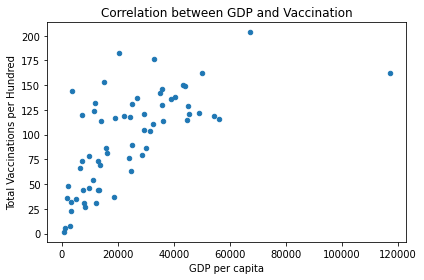

In [45]:
fig, ax = plt.subplots()

last_df.plot.scatter(x="gdp_per_capita", y="total_vaccinations_per_hundred", ax=ax)

ax.set_title("Correlation between GDP and Vaccination")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Total Vaccinations per Hundred")

plt.tight_layout()


There´s a clear positive correlation between the GDP per Capita of a country and the number of vaccines per hundred people.
 It means that different from the orientation of the World Health Organization, wealthier countries had more access to vaccines than poor ones.

## Conclusion
Although the World Health Organization first stated that "It’s vitally important that we secure the critical supply needed to serve all countries around the world and stem the pandemic", that did not happen. Wealthier countries had greater access to vaccinations.

Although we consider health a human right, we can't provide equitable health care, particularly during the pandemic. **While we still don't have all the technology to make health possible for everyone, we have to be lucky enough to be born in wealthier countries, enhancing our chances to live.**



---

*Disclaimer*: As previously mentioned, the data analyzed comes from different sources, which may cause a misrepresentation of reality. Due to these reasons, the analysis can not be considered conclusive. 